<a href="https://colab.research.google.com/github/DavidSentasas/CpE0332.1-1-Elective-3/blob/main/Laboratory-Activity-5/%20Laboratory-Activity-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Read an image
img = cv2.imread('/content/drive/MyDrive/Colab/flower.jpg')

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


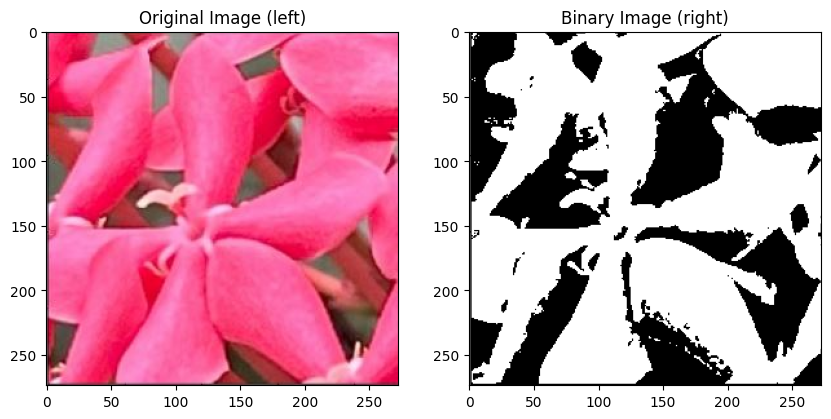

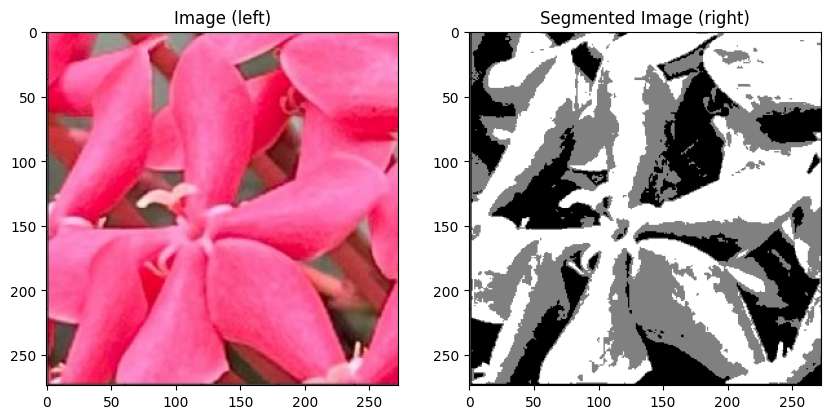

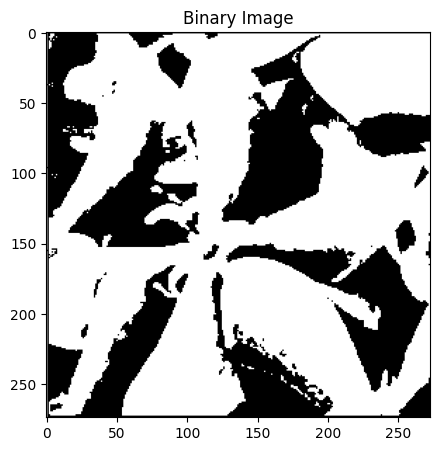

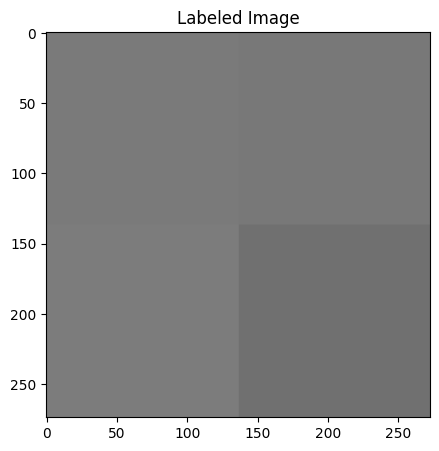

Number of connected components: 38


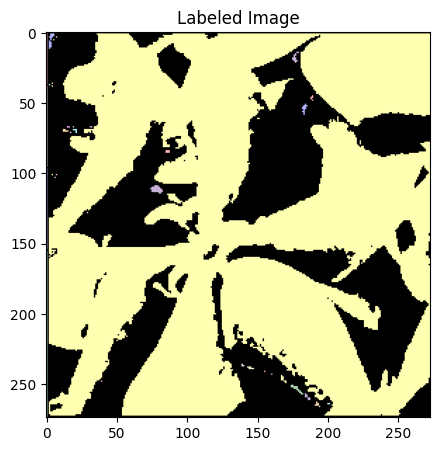

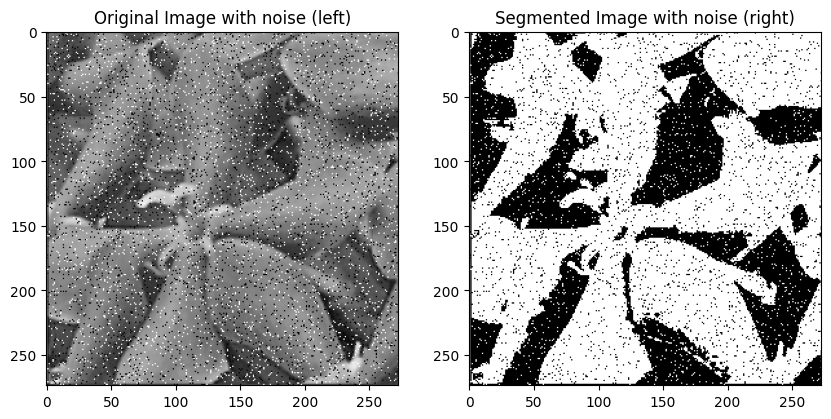

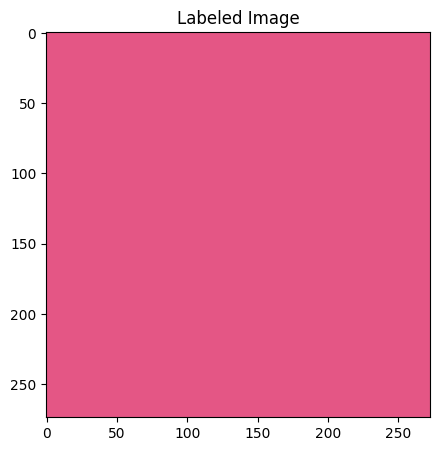

KeyboardInterrupt: 

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure, segmentation, util
from skimage.filters import threshold_otsu, gabor
from scipy.ndimage import gaussian_filter


# Load image
img = io.imread('/content/drive/MyDrive/Colab/flower.jpg')

# If the image has an alpha channel, remove it
if img.shape[2] == 4:
    img = img[:,:,:3]  # Keep only the first 3 channels (RGB)

gray_img = color.rgb2gray(img)

# Global Image thresholding using Otsu's method
level = threshold_otsu(gray_img)
bw = gray_img > level

# Display the original image and the binary image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title('Original Image (left)')
ax[1].imshow(bw, cmap='gray')
ax[1].set_title('Binary Image (right)')
plt.show()

# Calculate multiple thresholds using multithresh
levels = filters.threshold_multiotsu(gray_img)

# Segment the grayscale image into multiple regions using imquantize
seg_img = np.digitize(gray_img, bins=levels)

# Display both images side-by-side for comparison
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title('Image (left)')
ax[1].imshow(seg_img, cmap='gray')
ax[1].set_title('Segmented Image (right)')
plt.show()

# Global histogram threshold using Otsu's method
counts, bins = np.histogram(gray_img, bins=16)
T = threshold_otsu(gray_img)

# Create a binary image using the computed threshold and display the image
bw = gray_img > T
plt.figure(figsize=(5, 5))
plt.imshow(bw, cmap='gray')
plt.title('Binary Image')
plt.show()

# Using K means clustering
img2 = io.imread('/content/drive/MyDrive/Colab/flower.jpg')
bw_img2 = color.rgb2gray(img2)

# Segment the image into three regions using k-means clustering
L = segmentation.slic(bw_img2, n_segments=3, compactness=10, channel_axis=None)
B = color.label2rgb(L, bw_img2, kind='avg')

plt.figure(figsize=(5, 5))
plt.imshow(B)
plt.title('Labeled Image')
plt.show()

# Using connected-component labeling
bin_img2 = bw_img2 > threshold_otsu(bw_img2)
labeled_image, number_of_components = measure.label(bin_img2, return_num=True)

# Display the number of connected components
print(f'Number of connected components: {number_of_components}')

# Assign a different color to each connected component
colored_labels = color.label2rgb(labeled_image, image=bin_img2, bg_label=0, kind='overlay')

plt.figure(figsize=(5, 5))
plt.imshow(colored_labels)
plt.title('Labeled Image')
plt.show()

# Parameter Modifications

# Adding noise to the image then segmenting it using Otsu's method
img_noise = util.random_noise(gray_img, mode='s&p', amount=0.09)
level_noise = threshold_otsu(img_noise)
seg_img_noise = img_noise > level_noise

# Display the original image and the segmented image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_noise, cmap='gray')
ax[0].set_title('Original Image with noise (left)')
ax[1].imshow(seg_img_noise, cmap='gray')
ax[1].set_title('Segmented Image with noise (right)')
plt.show()

# Segment the image into two regions using k-means clustering
RGB = io.imread('/content/drive/MyDrive/Colab/flower.jpg')
L = segmentation.slic(RGB, n_segments=2, compactness=10, channel_axis=-1)
B = color.label2rgb(L, RGB, kind='avg')

plt.figure(figsize=(5, 5))
plt.imshow(B)
plt.title('Labeled Image')
plt.show()

# Create a set of 24 Gabor filters, covering 6 wavelengths and 4 orientations
wavelengths = [3 * (2 ** i) for i in range(6)]
orientations = [0, 45, 90, 135]
gabor_filters = [(w, o) for w in wavelengths for o in orientations]

# Convert the image to grayscale
bw_RGB = color.rgb2gray(RGB)

# Filter the grayscale image using the Gabor filters
filtered_images = [gabor(bw_RGB, frequency=1.0 / wavelength, theta=np.deg2rad(orientation))[0]
                   for wavelength, orientation in gabor_filters]

# Display the 24 filtered images in a montage
fig, ax = plt.subplots(4, 6, figsize=(15, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(filtered_images[i], cmap='gray')
    axi.axis('off')
plt.show()

# Smooth each filtered image to remove local variations
smoothed_images = [gaussian_filter(image, sigma=0.5 * wavelength) for image, (wavelength, _) in zip(filtered_images, gabor_filters)]

# Display the smoothed images in a montage
fig, ax = plt.subplots(4, 6, figsize=(15, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(smoothed_images[i], cmap='gray')
    axi.axis('off')
plt.show()

# Get the x and y coordinates of all pixels in the input image
nrows, ncols = RGB.shape[:2]
X, Y = np.meshgrid(np.arange(ncols), np.arange(nrows))
feature_set = np.dstack((bw_RGB, *smoothed_images, X, Y))

# Segment the image into two regions using k-means clustering with the supplemented feature set
L2 = segmentation.slic(feature_set, n_segments=2, compactness=10, channel_axis=-1, start_label=1)
C = color.label2rgb(L2, RGB, kind='avg')

plt.figure(figsize=(5, 5))
plt.imshow(C)
plt.title('Labeled Image with Additional Pixel Information')
plt.show()
